In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
disturbance = pd.read_excel('../data/nsw-assessment-of-grazing-intensity.xlsx', sheet_name='animal_disturbance')
print(disturbance.shape)
disturbance.head(3)

(1504, 7)


,Community,Site,Belt_length(m),Belt width (m),Belt_area(m2),Attribute,Count
0,Black box,BLA_001,200,10,200,Kangaroo hip holes,5
1,Black box,BLA_001,200,10,200,Rabbit burrows,0
2,Black box,BLA_001,200,10,200,Rabbit latrines,1


In [5]:
attribute = disturbance.groupby('Attribute').sum()['Count']
attribute

C:\Users\HP\AppData\Local\Temp\ipykernel_4928\1462270239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  attribute = disturbance.groupby('Attribute').sum()['Count']


Attribute
Kangaroo hip holes    2157
Rabbit burrows         634
Rabbit latrines       1101
Rabbit warrens         145
Name: Count, dtype: int64

Text(0, 0.5, 'Total Observed')

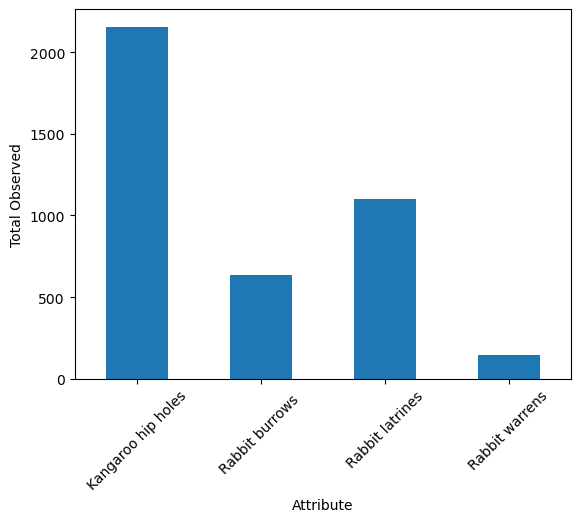

In [6]:
attribute.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("Total Observed")

In [29]:
dung = pd.read_excel('../data/nsw-assessment-of-grazing-intensity.xlsx', sheet_name='animal_dung')
print(dung.shape)
dung.head(3)

(6019, 7)


,Community,Site1,Site,Scale,Animal,Attribute,Counts
0,Black box,BLA_001_000,BLA_001,0.25,Kangaroo,dung,1
1,Black box,BLA_001_000,BLA_001,25.00,Cow,dung,28
2,Black box,BLA_001_000,BLA_001,25.00,Kangaroo,dung,10


In [33]:
dung = dung.groupby('Attribute').sum()
dung

Attribute
Kangaroo hip holes    2157
Rabbit burrows         634
Rabbit latrines       1101
Rabbit warrens         145
Name: Count, dtype: int64

In [25]:
pivot = pd.pivot_table(dung,
                       values='Counts',
                       index='Animal',
                       columns=['Attribute'],
                       aggfunc='sum',
                       margins=True)
pivot

Attribute,digs,dung,pugging,All
Animal,,,,
Cow,NaN,4634.0,8452.0,13086
Kangaroo,NaN,105541.0,NaN,105541
Rabbit,2979.0,131629.0,NaN,134608
Sheep,NaN,44980.0,NaN,44980
All,2979.0,286784.0,8452.0,298215


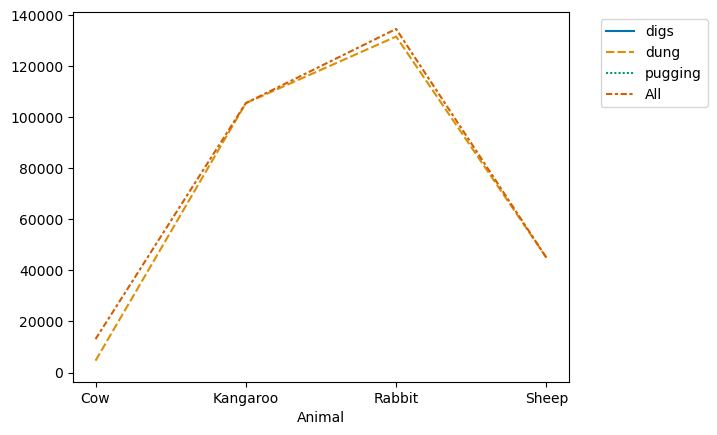

In [26]:
sns.lineplot(data=pivot.iloc[:-1],palette='colorblind') #iloc[:-1] causes the "All" row to not be graphed
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [10]:
pug = dung[dung['Attribute'].notna()]

# keep only pug counts
pug = dung[dung['Attribute'].str.contains('pug')]

pug.head()

,Community,Site1,Site,Scale,Animal,Attribute,Counts
6,Black box,BLA_001_050,BLA_001,25.0,Cow,pugging,14
13,Black box,BLA_001_200,BLA_001,25.0,Cow,pugging,70
17,Black box,BLA_002_000,BLA_002,25.0,Cow,pugging,4
22,Black box,BLA_002_050,BLA_002,25.0,Cow,pugging,8
26,Black box,BLA_002_100,BLA_002,25.0,Cow,pugging,3


In [11]:
dung1 = dung[dung['Attribute'].notna()]

# keep only dung counts
dung1 = dung[dung['Attribute'].str.contains('dung')]

dung1.head()

,Community,Site1,Site,Scale,Animal,Attribute,Counts
0,Black box,BLA_001_000,BLA_001,0.25,Kangaroo,dung,1
1,Black box,BLA_001_000,BLA_001,25.00,Cow,dung,28
2,Black box,BLA_001_000,BLA_001,25.00,Kangaroo,dung,10
3,Black box,BLA_001_000,BLA_001,25.00,Rabbit,dung,5
4,Black box,BLA_001_000,BLA_001,25.00,Sheep,dung,5


In [12]:
pivot1 = pd.pivot_table(dung1,
                       values='Counts',
                       index='Animal',
                       columns=['Attribute'],
                       aggfunc='sum',
                       margins=True)
pivot1

Attribute,dung,All
Animal,,
Cow,4634,4634
Kangaroo,105541,105541
Rabbit,131629,131629
Sheep,44980,44980
All,286784,286784


In [ ]:
# for index in pivot:
#     pivot[index] = pivot[index]/pivot['All']
# pivot

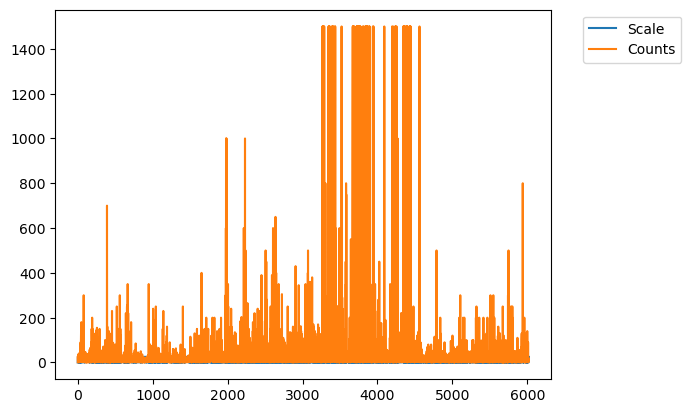

In [17]:
pivot1.dung1 = dung[dung['Attribute'].notna()]

# keep only dung counts
dung1 = dung[dung['Attribute'].str.contains('dung')]

dung1.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
sns.lineplot(data=pivot1.iloc[:-1].drop(columns=['All'], 
                                       axis=0), palette='colorblind') #iloc[:-1] causes the "All" row to not be graphed
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
dung_sum = dung.groupby('Attribute').sum()['Counts']
dung_sum

In [ ]:
dung_sum.plot(kind='bar')

In [ ]:
tracks = pd.read_excel('../data/nsw-assessment-of-grazing-intensity.xlsx', sheet_name='tracks')
print(tracks.shape)
tracks.head(3)

In [ ]:
tracks_count = tracks['Community'].value_counts()
tracks_count

In [ ]:
tracks_count.plot(kind='bar')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
tracks_count = tracks['Animal'].value_counts()
tracks_count

tracks_count.plot(kind='bar')

In [ ]:
area = tracks['Track_area_cm2'].value_counts()
area

## Do I want to keep using this dataset? Let's keep exploring other values I can measure in this dataset

In [ ]:
tracks.head(3)